In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from scipy.optimize import curve_fit
mat = io.loadmat('gain.mat')
gain_sameclus = mat['gain_sameclus']
gain_diffclus_crosspol = mat['gain_diffclus_crosspol']
gain_diffclus_samepol = mat['gain_diffclus_samepol']
azi_rot = mat['azi_rot']
ele_rot = mat['ele_rot']
realization = 1000
import seaborn as sns
from matplotlib import cm

Gain(Reali,Azimuth,Elevation)

In [2]:
angle_number=gain_sameclus.shape[1]
gain_sameclus_mean =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_crosspol_mean =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_samepol_mean =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_sameclus_var =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_crosspol_var =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_samepol_var =  np.zeros((angle_number,int(angle_number/2)),dtype=float)

for i in range(angle_number):
    for j in range(int(angle_number/2)):
        gain_sameclus_mean[i,j] = np.mean(gain_sameclus[:,i,j])
        gain_sameclus_var[i,j] = np.var(gain_sameclus[:,i,j])
        
        gain_diffclus_crosspol_mean[i,j] = np.mean(gain_diffclus_crosspol[:,i,j])
        gain_diffclus_crosspol_var[i,j] = np.var(gain_diffclus_crosspol[:,i,j])
        
        gain_diffclus_samepol_mean[i,j] = np.mean(gain_diffclus_samepol[:,i,j])
        gain_diffclus_samepol_var[i,j] = np.var(gain_diffclus_samepol[:,i,j])

In [3]:
# print(gain_sameclus_mean==gain_diffclus_samepol)
print(gain_sameclus_mean==gain_diffclus_crosspol_mean)
print(gain_diffclus_samepol_mean)
print(gain_diffclus_samepol_mean)

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
[[ 18.88476991  18.56359271  17.62652272 ...,  17.63070536  18.56610101
   18.88476991]
 [ 18.73625374  18.41783736  17.48803583 ...,  17.49216084  18.42014118
   18.73625374]
 [ 18.29867557  17.98782415  17.07980028 ...,  17.08378995  17.99010411
   18.29867557]
 ..., 
 [ 18.29867557  17.98782415  17.07980028 ...,  17.08378995  17.99010411
   18.29867557]
 [ 18.73625374  18.41783736  17.48803583 ...,  17.49216084  18.42014118
   18.73625374]
 [ 18.88476991  18.56359271  17.62652272 ...,  17.63070536  18.56610101
   18.88476991]]
[[ 18.88476991  18.56359271  17.62652272 ...,  17.63070536  18.56610101
   18.88476991]
 [ 18.73625374  18.41783736  17.48803583 ...,  17.49216084  18.42014118
   18.73625374]
 [ 18.29867557  

In [4]:
print(gain_sameclus_var)
print('-----------')
print(gain_diffclus_crosspol_var)
print('-----------')
print(gain_diffclus_samepol_var)

[[  92.40637894  101.05396061  117.77671021 ...,  106.09290945
    94.60780814   92.40637894]
 [  91.02062148  100.23043916  117.33893422 ...,  103.11996072
    92.45354011   91.02062148]
 [  87.07710673   97.88601381  116.08544407 ...,   94.65957549
    86.31818774   87.07710673]
 ..., 
 [  87.07710673   97.88601381  116.08544407 ...,   94.65957549
    86.31818774   87.07710673]
 [  91.02062148  100.23043916  117.33893422 ...,  103.11996072
    92.45354011   91.02062148]
 [  92.40637894  101.05396061  117.77671021 ...,  106.09290945
    94.60780814   92.40637894]]
-----------
[[ 0.01770297  0.09160183  0.83748332 ...,  0.83068354  0.08916643
   0.01770297]
 [ 0.01739163  0.09011645  0.82399099 ...,  0.81726383  0.08773826
   0.01739163]
 [ 0.01649605  0.08585386  0.78515657 ...,  0.77863797  0.08363291
   0.01649605]
 ..., 
 [ 0.01649605  0.08585386  0.78515657 ...,  0.77863797  0.08363291
   0.01649605]
 [ 0.01739163  0.09011645  0.82399099 ...,  0.81726383  0.08773826
   0.01739163]

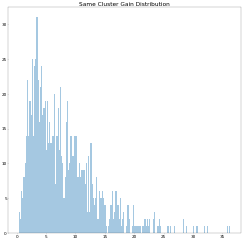

In [5]:
fig = plt.figure(figsize=(20,20), dpi=15)

plt.subplot(1, 1, 1)
plt.title('Same Cluster Gain Distribution', fontsize = 28)
sns.distplot(gain_diffclus_samepol[:,9,4],bins=180, kde = False)
# plt.xlim(0,100)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [6]:
print(azi_rot.shape)
print(ele_rot.shape)
print(azi_rot)
print(ele_rot)

(1, 50)
(1, 25)
[[ 0.          0.12822827  0.25645654  0.38468481  0.51291309  0.64114136
   0.76936963  0.8975979   1.02582617  1.15405444  1.28228272  1.41051099
   1.53873926  1.66696753  1.7951958   1.92342407  2.05165235  2.17988062
   2.30810889  2.43633716  2.56456543  2.6927937   2.82102197  2.94925025
   3.07747852  3.20570679  3.33393506  3.46216333  3.5903916   3.71861988
   3.84684815  3.97507642  4.10330469  4.23153296  4.35976123  4.48798951
   4.61621778  4.74444605  4.87267432  5.00090259  5.12913086  5.25735913
   5.38558741  5.51381568  5.64204395  5.77027222  5.89850049  6.02672876
   6.15495704  6.28318531]]
[[ 0.          0.13089969  0.26179939  0.39269908  0.52359878  0.65449847
   0.78539816  0.91629786  1.04719755  1.17809725  1.30899694  1.43989663
   1.57079633  1.70169602  1.83259571  1.96349541  2.0943951   2.2252948
   2.35619449  2.48709418  2.61799388  2.74889357  2.87979327  3.01069296
   3.14159265]]


In [7]:
print(gain_sameclus_mean)
print('-----------')
print(gain_diffclus_crosspol_mean)
print('-----------')
print(gain_diffclus_samepol_mean)

[[ 12.94509626  13.27752038  13.76437045 ...,  12.94172009  12.81610262
   12.94509626]
 [ 12.84691877  13.20955814  13.72353685 ...,  12.77716863  12.68349357
   12.84691877]
 [ 12.55945218  13.01133272  13.60344885 ...,  12.29504396  12.29607034
   12.55945218]
 ..., 
 [ 12.55945218  13.01133272  13.60344885 ...,  12.29504396  12.29607034
   12.55945218]
 [ 12.84691877  13.20955814  13.72353685 ...,  12.77716863  12.68349357
   12.84691877]
 [ 12.94509626  13.27752038  13.76437045 ...,  12.94172009  12.81610262
   12.94509626]]
-----------
[[ 0.19032364  0.48912223  1.42906454 ...,  1.41494134  0.47748069
   0.19032364]
 [ 0.18873546  0.48513191  1.41768915 ...,  1.40365857  0.47359468
   0.18873546]
 [ 0.18405874  0.47341595  1.38421854 ...,  1.37052807  0.46220486
   0.18405874]
 ..., 
 [ 0.18405874  0.47341595  1.38421854 ...,  1.37052807  0.46220486
   0.18405874]
 [ 0.18873546  0.48513191  1.41768915 ...,  1.40365857  0.47359468
   0.18873546]
 [ 0.19032364  0.48912223  1.429064

In [8]:
total_gain = np.zeros((3,angle_number,int(angle_number/2)))
total_gain[0,:,:]=gain_sameclus_mean
total_gain[1,:,:]=gain_diffclus_crosspol_mean
total_gain[2,:,:]=gain_diffclus_samepol_mean
index_gain_max = np.argmax(total_gain, axis=0)
# print(total_gain[index_gain_max])
gain_max=np.max(total_gain,axis=0)

In [9]:
print(index_gain_max)
print(gain_max)

[[2 2 2 ..., 2 2 2]
 [2 2 2 ..., 2 2 2]
 [2 2 2 ..., 2 2 2]
 ..., 
 [2 2 2 ..., 2 2 2]
 [2 2 2 ..., 2 2 2]
 [2 2 2 ..., 2 2 2]]
[[ 18.88476991  18.56359271  17.62652272 ...,  17.63070536  18.56610101
   18.88476991]
 [ 18.73625374  18.41783736  17.48803583 ...,  17.49216084  18.42014118
   18.73625374]
 [ 18.29867557  17.98782415  17.07980028 ...,  17.08378995  17.99010411
   18.29867557]
 ..., 
 [ 18.29867557  17.98782415  17.07980028 ...,  17.08378995  17.99010411
   18.29867557]
 [ 18.73625374  18.41783736  17.48803583 ...,  17.49216084  18.42014118
   18.73625374]
 [ 18.88476991  18.56359271  17.62652272 ...,  17.63070536  18.56610101
   18.88476991]]


In [10]:
aazi, eele = np.meshgrid(azi_rot, ele_rot, sparse=False, indexing='ij')
print(aazi)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.12822827  0.12822827  0.12822827 ...,  0.12822827  0.12822827
   0.12822827]
 [ 0.25645654  0.25645654  0.25645654 ...,  0.25645654  0.25645654
   0.25645654]
 ..., 
 [ 6.02672876  6.02672876  6.02672876 ...,  6.02672876  6.02672876
   6.02672876]
 [ 6.15495704  6.15495704  6.15495704 ...,  6.15495704  6.15495704
   6.15495704]
 [ 6.28318531  6.28318531  6.28318531 ...,  6.28318531  6.28318531
   6.28318531]]


In [11]:
test = np.unravel_index(gain_max.argmin(), gain_max.shape)
print(np.min(gain_max))
print(gain_diffclus_crosspol_mean[37,18])
print(gain_diffclus_samepol_mean[37,18])
print(gain_sameclus_mean[37,18])
print(np.mean(gain_diffclus_crosspol_mean))
print(np.mean(gain_diffclus_samepol_mean))
print(np.mean(gain_sameclus_mean))


4.1044413128
4.1044413128
4.10308374611
0.0142211464388
6.83207841983
7.38687210205
10.6345853053


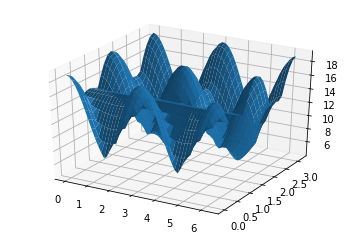

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# x = np.random.standard_normal(100)
# y = np.random.standard_normal(100)
# z = np.random.standard_normal(100)
# c = np.random.standard_normal(100)

ax.plot_surface(aazi, eele, gain_max)

plt.show()

In [13]:
print(np.max(gain_max))
print(np.max(gain_sameclus_mean))
print(np.max(gain_diffclus_crosspol_mean))
print(np.max(gain_diffclus_samepol_mean))
print(np.mean(gain_sameclus_mean))
print(np.mean(gain_diffclus_crosspol_mean))
print(np.mean(gain_diffclus_samepol_mean))

19.1881650629
15.3843652799
19.1881650629
19.1502621522
10.6345853053
6.83207841983
7.38687210205


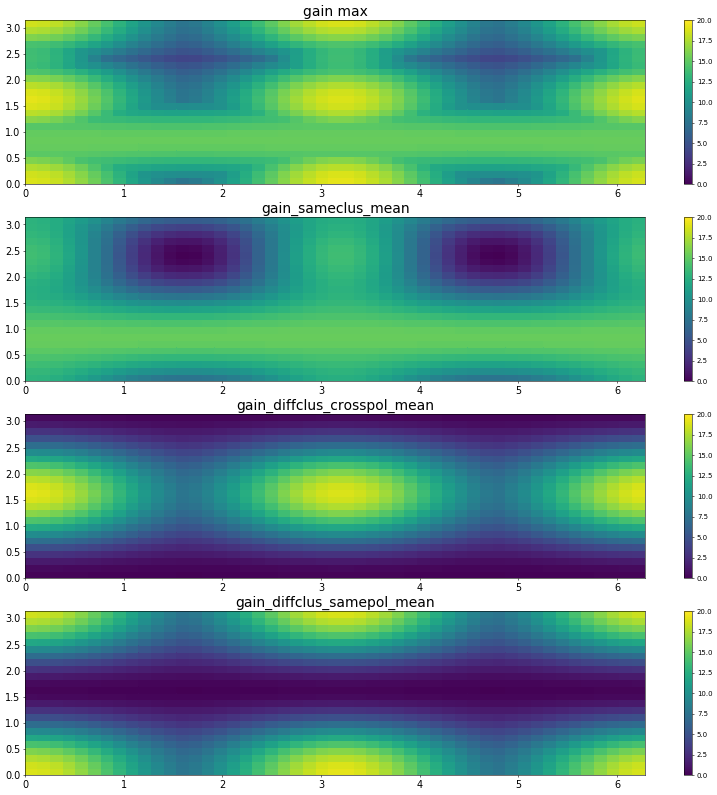

In [14]:
fig = plt.figure(figsize=(20,20), dpi=50)
plt.subplot(4, 1, 1)
plt.title('gain max', fontsize = 20)
plt.colorbar(plt.pcolor(aazi, eele, gain_max,vmin=0, vmax=20))
plt.tick_params(labelsize=14)

plt.subplot(4, 1, 2)
plt.title('gain_sameclus_mean', fontsize = 20)
plt.colorbar(plt.pcolor(aazi, eele, gain_sameclus_mean,vmin=0, vmax=20))
plt.tick_params(axis='both', which='major', labelsize=14)

plt.subplot(4, 1, 3)
plt.title('gain_diffclus_crosspol_mean', fontsize = 20)
plt.colorbar(plt.pcolor(aazi, eele, gain_diffclus_crosspol_mean,vmin=0, vmax=20))
plt.tick_params(axis='both', which='major', labelsize=14)

plt.subplot(4, 1, 4)
plt.title('gain_diffclus_samepol_mean', fontsize = 20)
plt.colorbar(plt.pcolor(aazi, eele, gain_diffclus_samepol_mean,vmin=0, vmax=20))
plt.tick_params(axis='both', which='major', labelsize=14)


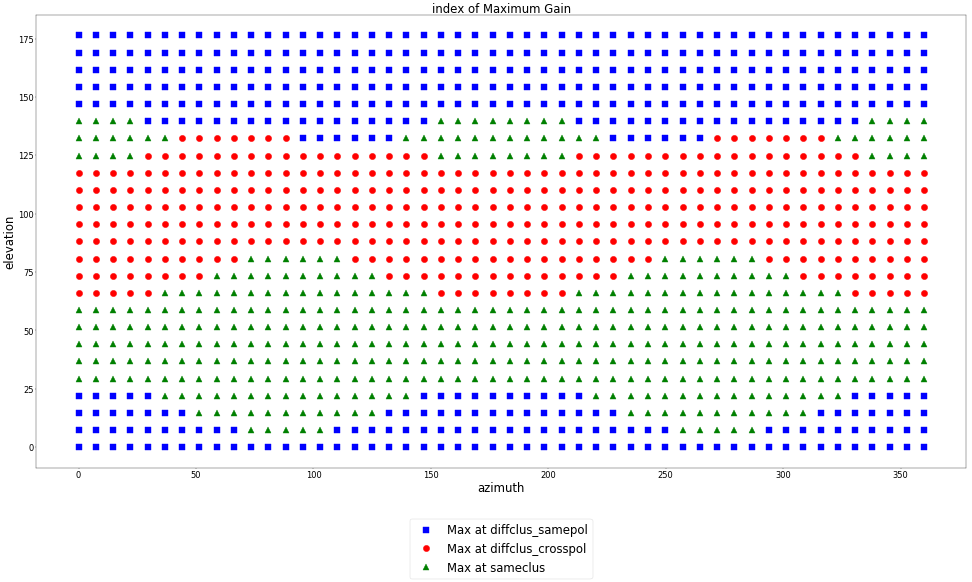

In [15]:
azi_diffclus_samepol,ele_diffclus_samepol = np.where( index_gain_max==2 )
azi_diffclus_crosspol,ele_diffclus_crosspol = np.where( index_gain_max==1 )
azi_sameclus,ele_sameclus = np.where( index_gain_max==0 )


fig = plt.figure(figsize=(40,20), dpi=30)
plt.plot(azi_diffclus_samepol*360/(angle_number-1),ele_diffclus_samepol*360/(angle_number-1),'bs', markersize = 15, label="Max at diffclus_samepol")
plt.plot(azi_diffclus_crosspol*360/(angle_number-1),ele_diffclus_crosspol*360/(angle_number-1),'ro', markersize = 15, label="Max at diffclus_crosspol")
plt.plot(azi_sameclus*360/(angle_number-1),ele_sameclus*360/(angle_number-1),'g^', markersize = 15, label="Max at sameclus")
plt.title('index of Maximum Gain', fontsize = 28)
plt.xlabel('azimuth',fontsize=28)
plt.ylabel('elevation',fontsize=28)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), prop={'size': 28})
plt.tick_params(axis='both', which='major', labelsize=20)

In [77]:
boundary_1 = np.zeros((2,angle_number))
boundary_2 = np.zeros((2,angle_number))
boundary_3 = np.zeros((2,angle_number))
boundary_4 = np.zeros((2,angle_number))

for i in range(angle_number):
    for j in range(int(angle_number/2)):
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_1[0,i] = i
            boundary_1[1,i] = (j+j+1)/2
            break
            
for i in range(angle_number):
    for j in range(ceil(boundary_1[1,i]),int(angle_number/2)):
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_2[0,i] = i
            boundary_2[1,i] = (j+j+1)/2
            break
            
for i in range(angle_number):
    for j in range(ceil(boundary_2[1,i]),int(angle_number/2)):
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_3[0,i] = i
            boundary_3[1,i] = (j+j+1)/2
            break
            
for i in range(angle_number):
    for j in range(ceil(boundary_3[1,i]),int(angle_number/2)):
        if j+1 == int(angle_number)/2:
            break
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_4[0,i] = i
            boundary_4[1,i] = (j+j+1)/2
            break

(0, 180)

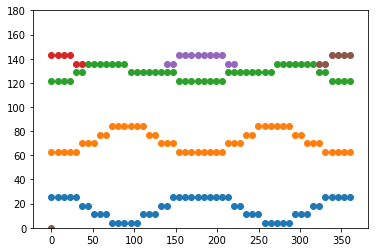

In [79]:
boundary_4_1 = boundary_4[:,:6]
boundary_4_2 = boundary_4[:,19:31]
boundary_4_3 = boundary_4[:,43:50]

plt.scatter(boundary_1[0,:]*360/(angle_number-1),boundary_1[1,:]*360/(angle_number-1))

plt.scatter(boundary_2[0,:]*360/(angle_number-1),boundary_2[1,:]*360/(angle_number-1))

plt.scatter(boundary_3[0,:]*360/(angle_number-1),boundary_3[1,:]*360/(angle_number-1))

plt.scatter(boundary_4_1[0,:]*360/(angle_number-1),boundary_4_1[1,:]*360/(angle_number-1))
plt.scatter(boundary_4_2[0,:]*360/(angle_number-1),boundary_4_2[1,:]*360/(angle_number-1))
plt.scatter(boundary_4_3[0,:]*360/(angle_number-1),boundary_4_3[1,:]*360/(angle_number-1))

plt.ylim(0,180)


In [82]:
boundary_4_3

array([[  0. ,  44. ,  45. ,  46. ,  47. ,  48. ,  49. ],
       [  0. ,  18.5,  18.5,  19.5,  19.5,  19.5,  19.5]])

___Fitting Curve___

In [18]:
def func(x, a, b, c):
    return a * np.cos(x + b) + c

[ 1.69645836  2.26      ]
[-1.44512881  9.78      ]


(0, 25)

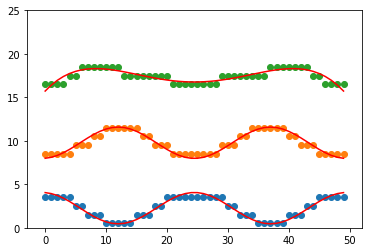

In [133]:
def func_sin(x, c, d):
    return np.sin(2*np.pi*x/25 + c)*1.8 + d


popt_boun1, pcov_boun1 = curve_fit(func_sin, boundary_1[0,:], boundary_1[1,:])
print(popt_boun1)
fit_bound1 = func_sin(boundary_1[0,:], *popt_boun1)
plt.scatter(boundary_1[0,:], boundary_1[1,:])
plt.plot(boundary_1[0,:], fit_bound1, 'r-', label='fit')


popt_boun2, pcov_boun2 = curve_fit(func_sin, boundary_2[0,:], boundary_2[1,:])
print(popt_boun2)
fit_bound2 = func_sin(boundary_2[0,:], *popt_boun2)
plt.scatter(boundary_2[0,:], boundary_2[1,:])
plt.plot(boundary_2[0,:], fit_bound2, 'r-', label='fit')


z = np.polyfit(boundary_3[0,:], boundary_3[1,:], 4)
p = np.poly1d(z)
plt.scatter(boundary_3[0,:],boundary_3[1,:])
plt.plot(boundary_3[0,:], p(boundary_3[0,:]), 'r-', label='fit')
plt.ylim(0,25)



In [144]:
p(boundary_4_1[0,:])

array([ 15.72171946,  16.40226244,  16.95701357,  17.39841148,
        17.73835396,  17.98819804])

           4            3           2
2.253e-05 x - 0.002208 x + 0.06936 x - 0.7477 x - 15.72


(0, 50)

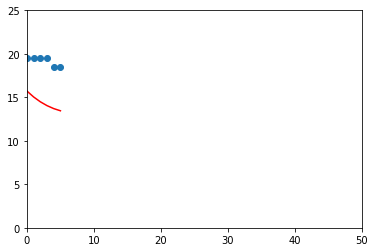

In [145]:
p1 = -p
# p1 = p + np.max(boundary_4_1[1,:])
print(np.poly1d(p1))

plt.scatter(boundary_4_1[0,:],boundary_4_1[1,:])
plt.plot(boundary_4_1[0,:], p[0]*2 + p1(boundary_4_1[0,:]), 'r-', label='fit')
plt.ylim(0,25)
plt.xlim(0,50)